<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go



Load the dataset into a dataframe.


In [77]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot: ylabel='Density'>

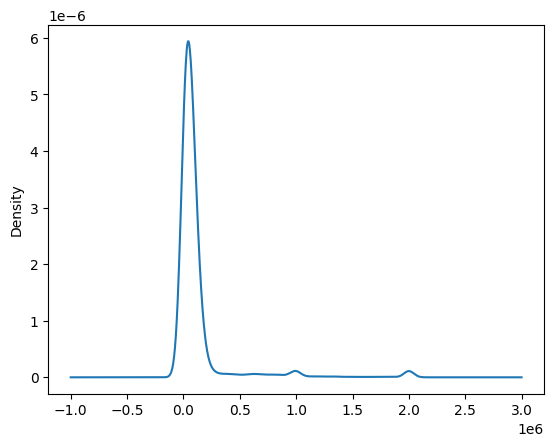

In [75]:
# your code goes here

df['ConvertedComp'].plot(kind='kde')

Plot the histogram for the column `ConvertedComp`.


In [64]:
# your code goes here
fig = px.histogram(df, x="ConvertedComp") 
fig.show()

In [91]:

df['Gender'].unique()

array(['Man', 'Woman',
       'Non-binary, genderqueer, or gender non-conforming', nan,
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Man;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [100]:
df = df.drop(df[df.Gender == 'Non-binary, genderqueer, or gender non-conforming'].index)
df = df.drop(df[df.Gender == 'Woman;Non-binary, genderqueer, or gender non-conforming'].index)
df = df.drop(df[df.Gender == 'Woman;Man'].index)
df = df.drop(df[df.Gender == 'Woman;Man;Non-binary, genderqueer, or gender non-conforming'].index)
df = df.drop(df[df.Gender == 'Man;Non-binary, genderqueer, or gender non-conforming'].index)


fig = px.box(df, y="ConvertedComp", x='Gender', width=1200, height=800)

fig.show()


In [ ]:
QUERY = """ 
SELECT LanguageWorkedWith, COUNT(*) as count 
from LanguageWorkedWith 
group by LanguageWorkedWith 
order by count(LanguageWorkedWith) DESC LIMIT 2 
""" 

df1=pd.read_sql_query(QUERY,conn)  

df1.head()
fig = px.pie(df1, values=df1['count'], names=df1['LanguageWorkedWith'], title='LanguageWorkedWith')
fig.show()

What is the median of the column `ConvertedComp`?


In [78]:
# your code goes here
df['Age'].median()

29.0

In [79]:
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [67]:
# your code goes here
df[df.Gender == 'Man'].shape[0]


10480

In [85]:
df[df.Gender == 'Woman'].shape[0]

694

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [80]:
# your code goes here
dfWomen = df[df.Gender == 'Woman']
dfWomen['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [26]:
# your code goes here
print(df['Age'].describe().loc['25%'])
df['Age'].describe()

25.0


count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


In [27]:
# your code goes here
fig = px.histogram(df, x="Age") 
fig.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


In [28]:
# your code goes here
fig = px.box(df, x="ConvertedComp") 
fig.show()

In [39]:
# your code goes here


75332.0

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [34]:
# your code goes here
Q3 = np.quantile(df['ConvertedComp'], 0.75)
Q1 = np.quantile(df['ConvertedComp'], 0.25)
IQR = Q3 - Q1
print(IQR)

75332.0


Find out the upper and lower bounds.


In [47]:
UpperBound = Q3 + (1.5*IQR)
Q3 + (1.5*IQR)

207998.0

Identify how many outliers are there in the `ConvertedComp` column.


In [48]:
# your code goes here

df[df['ConvertedComp']> UpperBound].shape[0]

881

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [87]:
# your code goes here
df_new=df
df_new.drop(df_new.loc[df['ConvertedComp']> UpperBound].index, inplace=True)
df_new['ConvertedComp'].mean()

59852.42913101742

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


<AxesSubplot: >

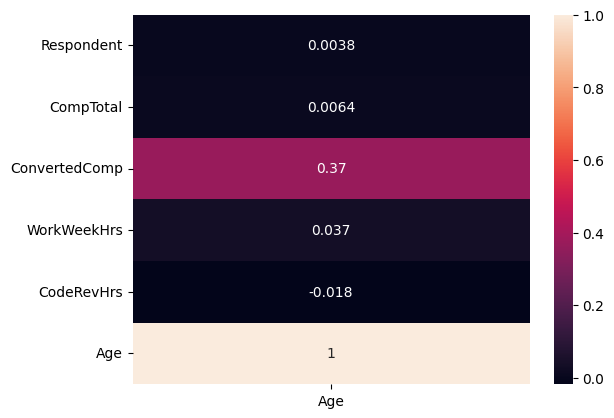

In [59]:
# your code goes here
corr = df.corr(numeric_only=True)[['Age']]
sns.heatmap(corr, annot=True)

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
